In [2]:
import pandas as pd

### 데이터 읽기(중요도/만족도 파일)

In [5]:
# 중요도 df 읽기
si= pd.read_csv('scaled_importance.csv') # 이미 스케일링 완료된 파일
td = pd.read_csv('topictable.csv')

In [6]:
si['0']

0      2.205309
1      3.260706
2      8.195008
3     10.000000
4      0.000000
5      3.525818
6      4.487929
7      1.572658
8      6.419331
9      9.682030
10     0.147989
11     2.927326
Name: 0, dtype: float64

In [13]:
toptopic = td['가장 비중이 높은 토픽']

In [9]:
# 만족도(감성 분석) df 읽기
sent = pd.read_csv('sentiment.csv')

In [14]:
sent['toptopic'] = toptopic

In [83]:
sent[['text_tokenized_3','sentiment','toptopic']]

,text_tokenized_3,sentiment,toptopic
0,"['칼라', '아악', '무', '재다', '다육', '키우다', '경험', '작년...",0.583522,2.0
1,"['두더지', '닭장', '밑', '고구마', '심다', '놓다', '두더지', '...",0.459360,7.0
2,"['미래', '집', '인공', '태양', '베란다', '해바라기', '키우다']",0.604976,2.0
3,"['땅', '떨어지다', '버찌', '줍다', '발아', '가능']",0.546978,1.0
4,"['다이소', '한련화', '크다', '어제', '빨갛다', '꽃', '꽃', '몽...",0.598985,6.0
...,...,...,...
55192,"['나무', '핀', '꽃', '꽃', '궁금하다', '감사하다']",0.719425,6.0
55193,"['꽃', '이름', '지인', '찍다', '꽃', '예쁘다']",0.749941,6.0
55194,"['물어보다', '다육', '화분', '버섯', '피다', '버섯', '피다', '...",0.524460,3.0
55195,"['독특하다', '생기다', '꽃', '풀', '가요']",0.705881,6.0


In [78]:
sent['text_tokenized_3'][(sent['sentiment']<0.4)] #부정 게시물

341             ['실수', '꽃', '밟다', '버리다', '이제', '감옥', '가라']
361                         ['벌레', '가요', '벌레', '사진', '주의']
663                                   ['무섭다', '크다', '모르다']
781            ['올리브', '나무', '죽다', '거죽', '건가', '못', '살리다']
856                                     ['친구', '썩다', '건가']
                               ...                        
54761                                       ['살리다', '살리다']
54850                                ['살리다', '죽다', '물어보다']
54878    ['칼', '코', '벌레', '가요', '징그럽다', '어떡하다', '자르다', ...
54944         ['벌레', '벌레', '벌레', '라면', '버리다', '가까이', '깜짝']
55000                                 ['고무나무', '죽다', '건가']
Name: text_tokenized_3, Length: 342, dtype: object

In [82]:
sent['text_tokenized_3'][(sent['sentiment']>0.7)] #긍정 게시물

10                                             ['꽃', '이름']
22                                           ['기여', '이쁘다']
23       ['식물', '키우다', '추천', '해주다', '작다', '화분', '키우다', ...
36       ['쪼금', '크다', '저번', '싹', '흙', '붙다', '오늘', '센티',...
43                                     ['꽃', '이름', '궁금하다']
                               ...                        
55158                                    ['꽃', '예쁘다', '꽃']
55170                                        ['꽃', '결혼식장']
55192                ['나무', '핀', '꽃', '꽃', '궁금하다', '감사하다']
55193                  ['꽃', '이름', '지인', '찍다', '꽃', '예쁘다']
55195                      ['독특하다', '생기다', '꽃', '풀', '가요']
Name: text_tokenized_3, Length: 3985, dtype: object

In [19]:
se = sent[['sentiment','toptopic']]

### 감성 점수 스케일링

In [21]:
mean_se = se.groupby(['toptopic'], as_index=False).mean()

In [24]:
satisfaction = mean_se['sentiment']

In [25]:
min_satisfaction = min(satisfaction)
max_satisfaction = max(satisfaction)

In [26]:
scaled_satisfaction= []
for i in range(12):
    a= 10 *((satisfaction[i]-min_satisfaction)/(max_satisfaction-min_satisfaction))
    scaled_satisfaction.append(a)

In [28]:
sd = scaled_satisfaction

In [31]:
si['satisfaction'] = sd

In [32]:
si

,Unnamed: 0,0,satisfaction
0,0,2.205309,0.237519
1,1,3.260706,4.264627
2,2,8.195008,5.533715
3,3,10.000000,10.000000
4,4,0.000000,4.555861
5,5,3.525818,3.931234
6,6,4.487929,9.467019
7,7,1.572658,3.665073
8,8,6.419331,2.587763
9,9,9.682030,0.000000


In [33]:
si.drop(columns = ["Unnamed: 0"], inplace=True)

In [34]:
si.columns = ['importance', 'satisfaction']

In [37]:
# count 
count_td = td.groupby(['가장 비중이 높은 토픽'], as_index=False).count()

In [41]:
co = count_td['Unnamed: 0']
si['count'] = co

In [56]:
si['group'] =["1",'2','3','4','5','6','7','8','9','10','11','12']

In [64]:
si.to_csv('total.csv') # R에서 활용할 예정

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [69]:
sorted(si['count'])

[634, 756, 1489, 2859, 3163, 3497, 3730, 4610, 6492, 8288, 9769, 9910]

In [70]:
si

,importance,satisfaction,count,group
0,2.205309,0.237519,2859,1
1,3.260706,4.264627,3497,2
2,8.195008,5.533715,8288,3
3,10.000000,10.000000,9769,4
4,0.000000,4.555861,756,5
5,3.525818,3.931234,3730,6
6,4.487929,9.467019,4610,7
7,1.572658,3.665073,1489,8
8,6.419331,2.587763,6492,9
9,9.682030,0.000000,9910,10


In [46]:
plt.rcParams['figure.figsize'] = [10, 8] # setting figure size

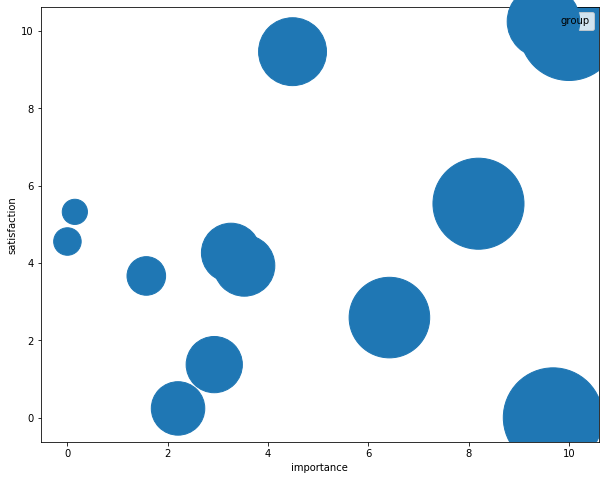

In [49]:
# 자세한 그래프 표현은 R 파일(5-2) 확인!
# scatter plot
si.plot(kind='scatter', x='importance', y='satisfaction', s='count',label='group') 

#plt.legend(loc = "best")
plt.xlabel('importance')
plt.ylabel('satisfaction')
plt.show()